In [1]:
import pandas as pd 
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import re

#sys.path.append(os.path.join(os.path.dirname(os.getcwd()), '../app'))
parent_dir = os.path.dirname(os.getcwd())
app_path = os.path.join(parent_dir, 'app')
sys.path.append(app_path)

import peakpos_df
import peak_fitting_v6

In [29]:
fp_file = "..\\Data\\FA_20240806_2H_yeast_Reference_standard_PBS.ser.csv"
fp_meta = "..\\Data\\Data_description_main.xlsx"

In [2]:
data = pd.read_csv("..\\Data\\FA_20240806_2H_yeast_Reference_standard_PBS.ser.csv")
LorentzianFit = peak_fitting_v6.PeakFitting(fp_file = "..\\Data\\FA_20240806_2H_yeast_Reference_standard_PBS.ser.csv"  , fp_meta = "..\\Data\\Data_description_main.xlsx")
print(LorentzianFit.positions)
print(LorentzianFit.names)

[4.7]
['Water']


In [3]:
fitting_params = LorentzianFit.fit(save_csv = False)


#get referenz concentration from meta data
mmol = re.findall(r'[0-9\.]+', LorentzianFit.meta_df.iloc[0]['Substrate_mM_added'])
mmol = float(mmol[0])

if mmol:
    print(mmol)  
else:
    print("mMol value couldn't be extracted from Substrate_mM_added ")

#calculate ref_factor
ref_factor = mmol / fitting_params['Water_amp_4.7'].mean()
ref_factor



FA_20240806_2H_yeast_Reference_standard_PBS.ser.csv:   0%|          | 0/130 [00:00<?, ?it/s]

FA_20240806_2H_yeast_Reference_standard_PBS.ser.csv: 100%|██████████| 130/130 [00:03<00:00, 33.51it/s]

12.7


0.038717873753674796

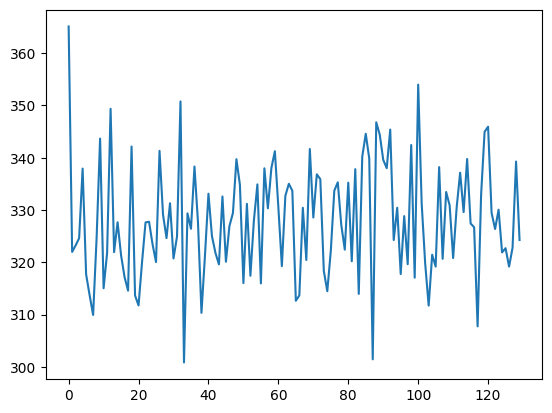

In [ ]:
#plt.show()

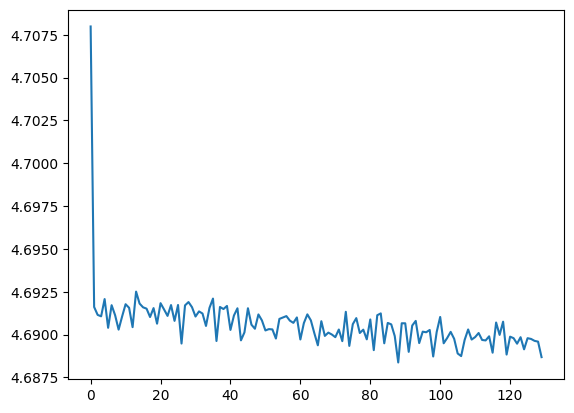

In [5]:
plt.plot(fitting_params['Water_pos_4.7'])

In [6]:
fitting_params['Water_amp_4.7']


Time
0      365.077441
1      321.990952
2      323.240992
3      324.609255
4      337.918112
          ...    
125    322.702497
126    319.179985
127    322.794452
128    339.265608
129    324.265937
Name: Water_amp_4.7, Length: 130, dtype: float64

In [30]:
class Reference():
    def __init__(self, fp_file, fp_meta):
        self.data = pd.read_csv(fp_file)
        self.chem_shifts = self.data.iloc[:,0]
        self.LorentzianFit = peak_fitting_v6.PeakFitting(fp_file = fp_file , fp_meta = fp_meta)
        self.fitting_params = LorentzianFit.fit(save_csv= False)
    
    def ReferenceValue(self):
        #get referenz concentration from meta data
        mmol = re.findall(r'[0-9\.]+', self.LorentzianFit.meta_df.iloc[0]['Substrate_mM_added'])
        mmol = float(mmol[0])

        if mmol:
            print(mmol)  
        else:
            print("mMol value couldn't be extracted from Substrate_mM_added ")

        #calculate ref_factor
        ref_factor = mmol / self.fitting_params['Water_amp_4.7'].mean()

        return ref_factor

    def plot_water_amplitude(self):

        fig, ax = plt.subplots()
        ax.plot(self.fitting_params['Water_amp_4.7'])
        ax.set_xlabel('time')  
        ax.set_ylabel('integral value water peak')
        
        plt.show()
        
        return fig, ax  
     
    
    def plot(self, i):
        
        spectra_data = self.data.iloc[:,i+1]
        
        fig, ax = plt.subplots()
        
        # actual curve
        ax.plot(self.chem_shifts, spectra_data, c='blue', label='Reference Spectrum')
        
        # Lorentzian
        y_lorentzian = LorentzianFit.lorentzian(x=self.data.iloc[:,0], 
                                                 shift=fitting_params.iloc[i]['Water_pos_4.7'],
                                                 gamma=fitting_params.iloc[i]['Water_width_4.7'], 
                                                 A=fitting_params.iloc[i]['Water_amp_4.7'])
        ax.plot(self.chem_shifts, y_lorentzian, c='red', label='Lorentzian fit')
        
        ax.set_xlabel('Chemical Shifts')
        ax.set_ylabel('Intensity')
        ax.legend()
        
        plt.show()
        
        return fig, ax 
        


In [31]:
WaterReference = Reference(fp_file = fp_file, fp_meta = fp_meta)

FA_20240806_2H_yeast_Reference_standard_PBS.ser.csv: 100%|██████████| 130/130 [00:03<00:00, 38.22it/s]


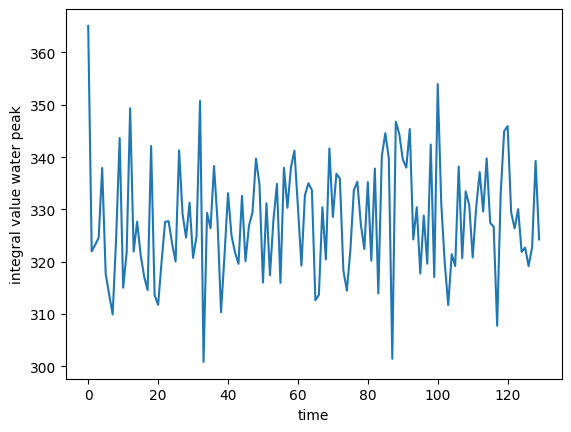

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='time', ylabel='integral value water peak'>)

In [32]:
WaterReference.plot_water_amplitude()

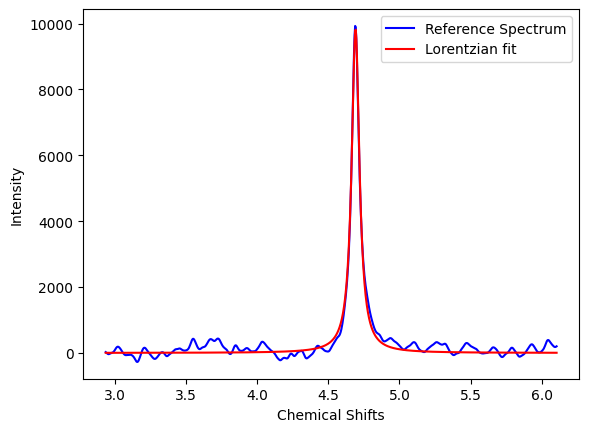

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Chemical Shifts', ylabel='Intensity'>)

In [34]:
WaterReference.plot(i = 3)

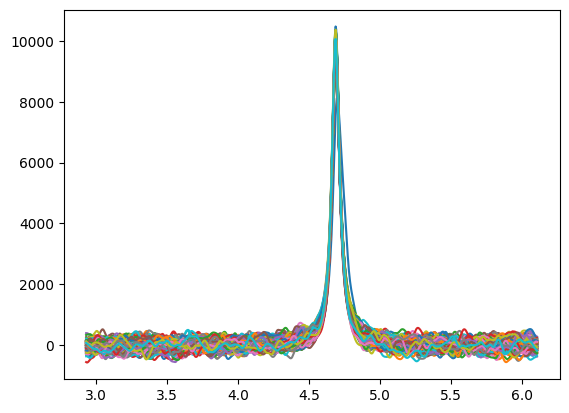

In [8]:
spectra_data= data.iloc[:,1:]
chem_shifts = data.iloc[:,0]
plt.plot(chem_shifts, spectra_data, label='sum of spectra')
plt.show()


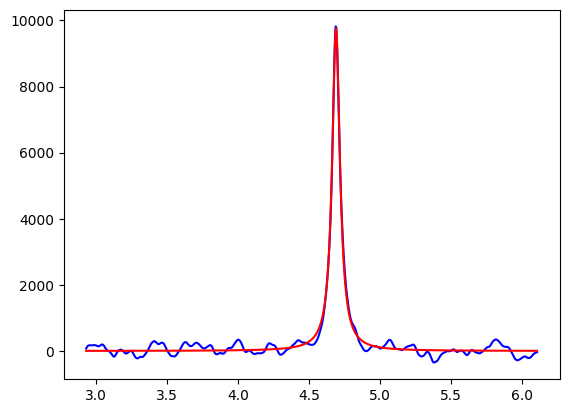

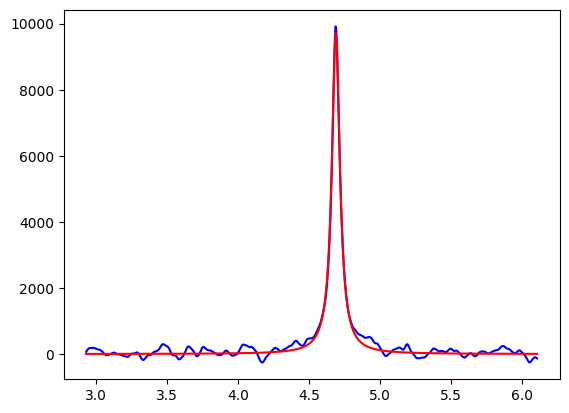

In [28]:
time = ([1,40])


for i in time: #i ist Zeitpunkt
        chem_shifts = data.iloc[:,0]
        #actual curve
        spectra_data= data.iloc[:,i+1]
        plt.plot(chem_shifts, spectra_data, c = 'blue' )

        #plot lorentzian
        y_lorentzian = LorentzianFit.lorentzian( x = data.iloc[:,0], 
                                                shift = fitting_params.iloc[i]['Water_pos_4.7'],
                                                gamma = fitting_params.iloc[i]['Water_width_4.7'], 
                                                A = fitting_params.iloc[i]['Water_amp_4.7'])
        plt.plot(chem_shifts, y_lorentzian, c = 'red' )

        plt.show()
        
